# Práctica de preparación de datos con Python

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#import sys
#reload(sys)
#sys.setdefaultencoding('utf-8')

Las respuestas a los ejercicios deben rellenarse en este mismo Notebook. Asegúrese de que todas las celdas de código funcionan correctamente al ejecutarlas en su orden de aparición en el Notebook.

#### Ejercicio 1 (1 pto.)

Escriba una función a la que se le pase un array bidimensional de NumPy, intreprete cada columna como un vector, calcule su <a href="http://es.wikipedia.org/wiki/Norma_vectorial#Definici.C3.B3n_de_norma_eucl.C3.ADdea">norma euclídea</a> y devuelva los resutados en forma de array unidimensional.

No utilice para ello la función `numpy.linalg.norm`.

No utilice bucles para la implementación.

In [2]:
def norma_euclidea(a):
    return np.sqrt((a*a).sum(axis=0))

a = np.random.randint(10, size=(4,4))
print a
norma_euclidea(a)

[[8 6 9 3]
 [6 3 0 7]
 [9 1 7 0]
 [6 6 9 1]]


array([ 14.73091986,   9.05538514,  14.52583905,   7.68114575])

**Nota**: Suponemos que el array pasado como parámetro tiene fijadas sus componentes a una **base ortonormal**

#### Ejercicio 2 (1 pto.)

Escriba una función que elimine los *outliers* (valores atípicos) de un array de NumPy de la siguiente manera: si un valor se desvía de la media de todos los valores en más de dos desviaciones estándar, se sustituirá ese valor por la media.

No utilice bucles para la implementación.

In [3]:
def del_outliers(a):
    a_mean = np.mean(a) # Calculamos la media de los valores del array
    a_std = np.std(a) # Calculamos la desviación estándar de los valores del array
    a_mask = abs(a-a_mean) > 2*a_std
    a[a_mask] = a_mean
    return a # Sustituimos según el enunciado con np.place()

arr = np.random.normal(0, 0.1, (5, 5))
del_outliers(arr)

array([[ 0.02605622,  0.01011378,  0.07449043,  0.02184988, -0.10272671],
       [ 0.08792262,  0.03185897, -0.12884093, -0.02247621,  0.07741586],
       [ 0.03231927,  0.01902509,  0.09569284, -0.01739756, -0.06289502],
       [ 0.03909201,  0.02847634,  0.02537797,  0.0854323 ,  0.03375578],
       [-0.03707554, -0.06694731, -0.1198912 ,  0.0274112 ,  0.02184988]])

#### Ejercicio 3 (1 pto.)

El fichero 'datos/presidentialElections.csv' es un conjunto de datos sobre el porcentaje de voto demócrata en las elecciones presidenciales de Estados Unidos por estado y año. 

El conjunto de datos ha sido descargado del siguiente repositorio: http://vincentarelbundock.github.io/Rdatasets/datasets.html. Puede consultarse una breve documentación <a href="http://vincentarelbundock.github.io/Rdatasets/doc/pscl/presidentialElections.html">en este enlace</a>.

Cargue el conjunto de datos desde el fichero a un DataFrame de `pandas`, de modo que la primera columna del CSV, con identificadores numéricos crecientes, sea utilizada como índice. Asegúrese de que en el DataFrame obtenido no esté la última fila del CSV, con nombre de estado "Total". 


In [2]:
votes = pd.read_csv("datos/presidentialElections.csv", index_col=[0], skipfooter=1, engine="python")
votes

,state,demVote,year,south
1,Alabama,84.76,1932,True
2,Arizona,67.03,1932,False
3,Arkansas,86.27,1932,True
4,California,58.41,1932,False
5,Colorado,54.81,1932,False
6,Connecticut,47.40,1932,False
7,Delaware,48.11,1932,False
8,Florida,74.49,1932,True
9,Georgia,91.60,1932,True
10,Idaho,58.70,1932,False


#### Ejercicio 4 (1 pto.)

Utilizando `pandas`, genere una tabla en la que el índice de las filas sea el nombre del estado, el índice de las columnas el año y en el interior se muestre el porcentaje de voto demócrata.

In [5]:
votes_pivot = votes.pivot_table('demVote', index='state', columns='year')
votes_pivot

year,1932,1936,1940,1944,1948,1952,1956,1960,1964,1968,...,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012
state,,,,,,,,,,,,,,,,,,,,,
Alabama,84.76,86.38,85.22,81.28,NaN,64.55,56.52,56.83,NaN,18.72,...,55.73,47.45,38.28,39.86,40.88,43.16,41.59,36.84,38.74,NaN
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.06,65.91,42.65,...,35.65,26.41,29.87,36.27,30.29,33.27,27.67,35.52,37.89,40.81
Arizona,67.03,69.85,63.49,58.80,53.79,41.65,38.90,44.36,49.45,35.02,...,39.80,28.24,32.54,38.74,36.52,46.52,44.67,44.40,44.91,44.45
Arkansas,86.27,81.79,78.44,69.95,61.72,55.90,52.46,50.19,56.06,30.36,...,64.96,47.52,38.29,42.19,53.21,53.74,45.86,44.55,38.86,36.88
California,58.41,66.95,57.44,56.48,47.57,42.74,44.27,49.55,59.11,44.74,...,47.57,35.91,41.27,47.56,46.01,51.10,53.45,54.31,60.94,60.19
Colorado,54.81,60.37,48.37,46.40,51.88,38.96,39.26,44.91,61.27,41.32,...,42.56,31.07,35.12,45.28,40.13,44.43,42.39,47.02,53.66,51.45
Connecticut,47.40,55.32,53.44,52.30,47.91,43.91,36.26,53.73,67.81,49.48,...,46.90,38.52,38.83,46.87,42.21,52.83,55.91,54.31,60.59,58.06
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.50,81.82,...,81.63,74.82,85.38,82.65,84.64,85.19,85.16,89.18,92.46,90.91
Delaware,48.11,54.62,54.70,54.38,48.76,47.88,44.62,50.63,60.95,41.61,...,51.98,44.83,39.93,43.48,43.51,51.82,54.96,53.35,61.91,58.61


#### Ejercicio 5 (1 pto.)

Genere la lista ordenada de estados que, como promedio a lo largo de los años, tienen un mayor porcentaje de voto demócrata.

In [6]:
votes_sorted = votes["demVote"].groupby(votes["state"]).mean()
votes_sorted.sort()
votes_sorted

state
Alaska            37.563571
Nebraska          38.562381
Idaho             38.916190
Utah              39.167143
Kansas            39.627143
Wyoming           39.827619
North Dakota      41.815714
South Dakota      43.361429
Indiana           43.880000
Oklahoma          44.259048
New Hampshire     44.917619
Arizona           45.476190
Colorado          45.488095
Vermont           45.988571
Montana           45.996190
Maine             46.271905
Ohio              47.190000
Kentucky          47.533810
Nevada            47.546190
Iowa              47.860000
Virginia          47.900000
New Jersey        48.511429
Tennessee         48.701905
Mississippi       49.004762
Oregon            49.301429
Pennsylvania      49.327143
Michigan          49.327619
New Mexico        49.344286
Wisconsin         49.377619
Florida           49.383333
Connecticut       49.653333
Missouri          49.654286
Delaware          49.991429
Illinois          50.395238
West Virginia     50.488095
Washington    

#### Ejercicio 6 (1 pto.)

Represente en una gráfica de línea la evolución del porcentaje de voto demócrata en el conjunto de los estados sureños frente a los no sureños. Utilice simplemente la media del voto a lo largo de todos los estado de cada grupo, sin tener en cuenta las diferencias de población en cada estado.

south      False      True 
year                       
1932   56.655946  83.361818
1936   59.233514  83.204545
1940   52.778919  80.905455
1944   51.090811  75.089091
1948   50.221622  45.933000
1952   40.931351  53.893636
1956   40.148378  49.341818
1960   48.045128  50.129091
1964   62.967500  47.875000
1968   44.702250  28.963636
1972   38.361500  27.853636
1976   47.993250  55.190909
1980   38.151500  46.232727
1984   39.886250  37.712727
1988   46.363750  40.600909
1992   41.797500  42.744545
1996   48.348250  46.530000
2000   46.701000  43.514545
2004   47.750500  42.048182
2008   53.120000  44.635455
2012   50.493250  44.060000


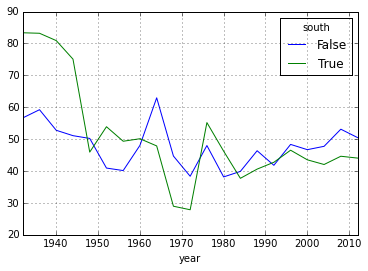

In [7]:
votes_series = votes.pivot_table("demVote", index="year", columns="south", aggfunc=np.mean)
print votes_series
votes_series.plot()

#### Ejercicio 7 (0.5 ptos.)

Cargue en otro DataFrame el fichero de datos 'datos/Product.csv', obtenido del mismo repositorio que los datos sobre elecciones. Este conjunto de datos tiene algunos datos económicos para cada estado.

Puede consultarse <a href="http://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Produc.html">aquí</a> una pequeña descripción del modelo de datos.

In [3]:
products = pd.read_csv("datos/Product.csv", index_col=[0])
products

,state,year,pcap,hwy,water,util,pc,gsp,emp,unemp
1,ALABAMA,1970,15032.67,7325.80,1655.68,6051.20,35793.80,28418,1010.5,4.7
2,ALABAMA,1971,15501.94,7525.94,1721.02,6254.98,37299.91,29375,1021.9,5.2
3,ALABAMA,1972,15972.41,7765.42,1764.75,6442.23,38670.30,31303,1072.3,4.7
4,ALABAMA,1973,16406.26,7907.66,1742.41,6756.19,40084.01,33430,1135.5,3.9
5,ALABAMA,1974,16762.67,8025.52,1734.85,7002.29,42057.31,33749,1169.8,5.5
6,ALABAMA,1975,17316.26,8158.23,1752.27,7405.76,43971.71,33604,1155.4,7.7
7,ALABAMA,1976,17732.86,8228.19,1799.74,7704.93,50221.57,35764,1207.0,6.8
8,ALABAMA,1977,18111.93,8365.67,1845.11,7901.15,51084.99,37463,1269.2,7.4
9,ALABAMA,1978,18479.74,8510.64,1960.51,8008.59,52604.05,39964,1336.5,6.3
10,ALABAMA,1979,18881.49,8640.61,2081.91,8158.97,54525.86,40979,1362.0,7.1


#### Ejercicio 8 (1 pto.)

Combine la tabla sobre las elecciones y la de producción por estados, realizando un "inner join" que utilice como clave el nombre de estado y año.

Observe que en uno de los DataFrames los nombres de estado aparecen en mayúsculas. Transforme los valores de la correspondiente columna en el otro DataFrame para que los nombres aparezcan también en mayúsculas y el join funcione correctamente.

In [4]:
## DataFrame de la tabla de votos democratas. Modificacion de la columna 'state' a mayusculas
votes_temp = votes.copy()
votes_temp.state = votes_temp.state.map(lambda x: x.upper())
votes_temp

## Merge de tabla de votos y productos
votes_products = pd.merge(votes_temp, products, left_on=['state', 'year'], right_on=['state', 'year'])
votes_products

,state,demVote,year,south,pcap,hwy,water,util,pc,gsp,emp,unemp
0,ALABAMA,25.54,1972,True,15972.41,7765.42,1764.75,6442.23,38670.30,31303,1072.3,4.7
1,ARIZONA,31.87,1972,False,10977.53,4847.84,1614.58,4515.11,26058.65,23289,646.3,4.2
2,ARKANSAS,30.69,1972,True,8309.01,3780.05,668.50,3860.47,21245.48,17702,581.5,4.6
3,CALIFORNIA,41.54,1972,False,134451.52,46045.52,18813.82,69592.17,187587.86,281159,7209.9,7.6
4,COLORADO,34.59,1972,False,12010.91,4757.59,2133.49,5119.84,26010.17,29624,869.4,3.6
5,CONNECTICUT,40.13,1972,False,17346.79,7407.46,2642.54,7296.80,26191.58,40037,1190.4,8.2
6,DELAWARE,39.18,1972,False,4560.71,2105.30,233.59,2221.82,6602.65,7829,232.4,4.7
7,FLORIDA,27.80,1972,True,32089.12,13424.21,4318.05,14346.86,62873.97,81313,2513.1,4.5
8,GEORGIA,24.65,1972,True,20167.45,8433.38,2165.53,9568.54,45402.82,49402,1695.2,4.1
9,IDAHO,26.04,1972,False,3676.22,2353.72,247.87,1074.64,9756.40,7898,236.5,6.2


#### Ejercicio 9 (1 pto.)

Calcule la correlación entre la tasa de desempleo y el porcentaje de voto demócrata.

In [5]:
votes_products.corr()

,demVote,year,south,pcap,hwy,water,util,pc,gsp,emp,unemp
demVote,1.000000,1.162988e-02,7.680396e-02,0.192266,0.207957,0.177879,0.179143,0.142335,0.159230,0.191826,0.341678
year,0.011630,1.000000e+00,-9.779181e-18,0.069242,0.042613,0.115484,0.071159,0.138740,0.104851,0.105953,0.356944
south,0.076804,-9.779181e-18,1.000000e+00,0.042386,0.096022,0.012886,0.011338,0.227441,0.099628,0.082759,-0.017459
pcap,0.192266,6.924239e-02,4.238559e-02,1.000000,0.979409,0.981425,0.988216,0.877400,0.977260,0.978260,0.214200
hwy,0.207957,4.261300e-02,9.602184e-02,0.979409,1.000000,0.955701,0.939719,0.909215,0.967186,0.969425,0.190467
water,0.177879,1.154839e-01,1.288566e-02,0.981425,0.955701,1.000000,0.961677,0.876009,0.972061,0.969329,0.227484
util,0.179143,7.115893e-02,1.133774e-02,0.988216,0.939719,0.961677,1.000000,0.825408,0.954044,0.955341,0.220149
pc,0.142335,1.387405e-01,2.274412e-01,0.877400,0.909215,0.876009,0.825408,1.000000,0.936867,0.905722,0.158152
gsp,0.159230,1.048508e-01,9.962751e-02,0.977260,0.967186,0.972061,0.954044,0.936867,1.000000,0.989172,0.172290
emp,0.191826,1.059526e-01,8.275950e-02,0.978260,0.969425,0.969329,0.955341,0.905722,0.989172,1.000000,0.185667


#### Ejercicio 10 (1,5 ptos.)

Genere alguna tabla, gráfico o estadístico que permita comprender mejor o aporte una perspectiva nueva o inesperada sobre los conjuntos de datos con los que estamos trabajando.

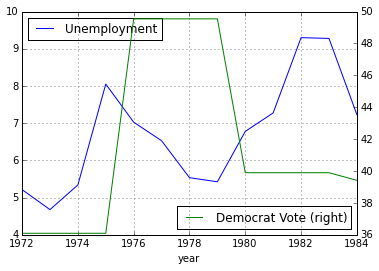

In [11]:
## Calcular la evolución de la tasa de desempleo desde 1968 hasta 1984 y compararla con el voto democrata.

## Obtenemos los valores medios por año del DataFrame Product desde 1968 a 1984
products_70_84 = products[products["year"] >= 1968][products["year"] <= 1984].groupby(products["year"], as_index=False).mean()
## Obtenemos los valores medios de voto democrata obtenido por año (las elecciones son cada 4 años)
votes_year = votes.groupby(votes["year"], as_index=False).mean()

## Agrupamos los dos DataFrames, con prioridad al Product sobre Votes para que no se pierdan años de Product
products_votes_70_84 = products_70_84.merge(votes_year, how="left", left_on=['year'], right_on=['year'])
## Ajustamos el indice del nuevo DataFrame al año
products_votes_70_84 = products_votes_70_84.set_index(["year"])
## Eliminamos las columnas que no nos sean utiles
products_votes_70_84 = products_votes_70_84.drop(["pcap", "hwy", "water", "util", "pc", "gsp", "emp", "south"], axis=1)
## Rellenamos los NaN del numero de votos (solo hay elecciones cada 4 años) con el resultado de la votacion anterior
products_votes_70_84.fillna(method="ffill", inplace=True)
## Eliminamos las filas correspondientes a 1970 y 1972 porque no tienen datos utiles para nuestro estudio
products_votes_70_84 = products_votes_70_84.drop([1970, 1971])


## Mostramos una gráfica que muestre la evolucion de la tasa de desempleo y el numero de votos obtenidos por
## el partido democrata desde 1972 a 1984
products_votes_70_84.unemp.plot(label="Unemployment", legend=True)
products_votes_70_84.demVote.plot(secondary_y=True, label="Democrat Vote", legend=True)

